# Snake - reproducibility (figures and captions)

To display image saved as pdf inside the Jupyter-Notebook we use [Wand](http://docs.wand-py.org/).
To install Wand:

    > pip install wand

In [1]:
import os

from IPython.core.display import display, Image
from wand.image import Image as WImage

## OpenFOAM (IcoFOAM)

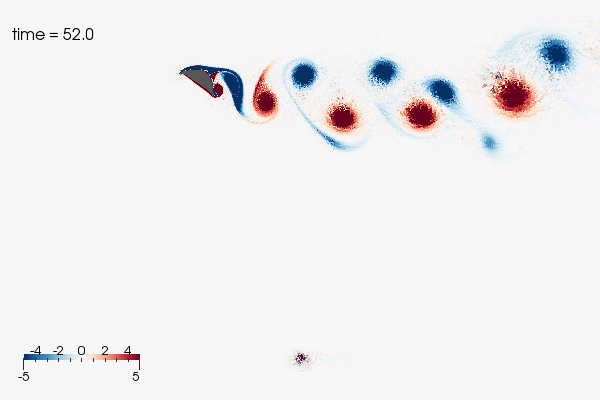

In [2]:
path = os.path.join(os.getcwd(), 
                    'openfoam', 
                    'openfoam_vorticity52Re2000AoA35_gmshZeroGradient.pdf')
display(WImage(filename=path))

#### Figure

Filled contours of the vorticity field after 52 non-dimensional time-units of flow simulation.
The bluff body (of unit chord-length) is centered in the domain [-15, 15]x[-15, 15].
We created a computational mesh of 700k triangles using the software GMSH.
The mesh is refined in the vicinity of the snake with a characteristic length of 0.004 (minimum cell-width used in Krishnan et al., 2014) and becomes coarser as we move away from the body.
Vortices shed by the snake cross-section form a Von Karman street.
Even if the mesh passes the OpenFOAM sanity checks (utility `checkMesh`), we observed that poor-quality triangles caused the degeneration of the solution (see the vorticity spot on the bottom part of the figure while we would expect a freestream flow).
The degeneration of the solution occurred for any snake configuration (angle-of-attack and Reynolds number) and was not responsible for the simulation to crash.

Note to ourselves: 
* I used GMSH through its GUI to generate the mesh and I do not have the exact parameters to reproduce the mesh.
* Krishnan et al. (2014) reported that at angle-of-attack 35 degrees and Reynolds number 2000, the vortices in the near-wake (just behind the bluff-body) remains aligned. Here, after 52 time-units, we observe a 1S+1P wake signature. This is because a vortex merging phenomenon permanently destroyed the alignment. As a consequence, it lowers the mean lift force on the snake.
* I used a zero-gradient condition for the pressure at the inlet and outlet.

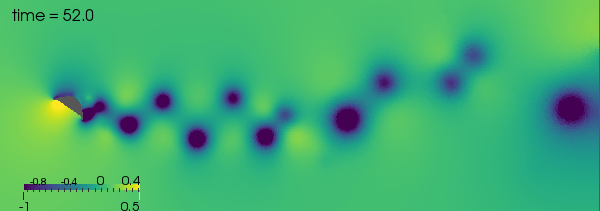

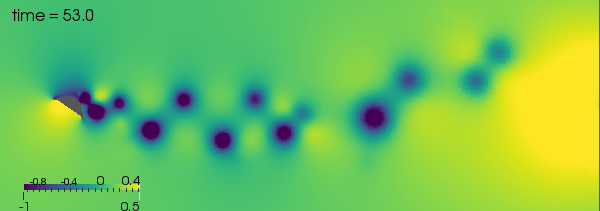

In [3]:
path = os.path.join(os.getcwd(), 
                    'openfoam',
                    'openfoam_pressure52Re2000AoA35_gmshZeroGradient.pdf')
display(WImage(filename=path))
path = os.path.join(os.getcwd(), 
                    'openfoam',
                    'openfoam_pressure53Re2000AoA35_gmshZeroGradient.pdf')
display(WImage(filename=path))

#### Figure

Filled contours of the pressure field after 52 (top) and 53 (bottom) time-units of flow simulation when the cross-section forms a 35-degree angle with the freestream direction and at Reynolds number 2000.
The right side of the figures coincides with the outlet boundary of the computational domain.
We used a zero-gradient condition for the pressure at the outlet.
After 52 time-units a vortex (local swirling of the flow associated with negative pressure) is ready the leave the computational domain at the outlet.
At 53 time-units, we observe a localized over pressure at the outlet induced by the vortex (now outside the domain).
No matter the snake configuration, we observed a localized unphysical over-pressure at the outlet when vortices were convected outside the domain.
However, for the specific angle-of-attack (35 degrees) and a Reynolds number of 2000, the simulation crashed after approximatively 62 time-units due to an amplification of the over-pressure.

Note to ourselves:
* Those two figures come from the same simulation than the vorticity field figure above. We used a 700k triangular GMSH mesh.

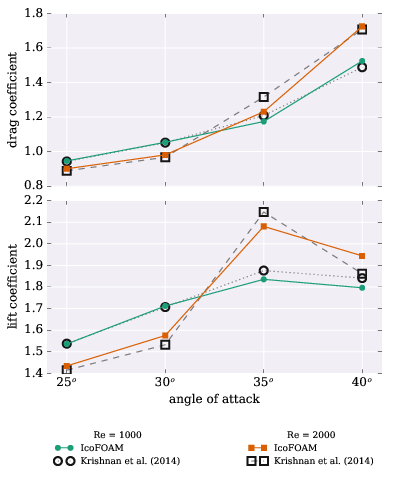

In [4]:
path = os.path.join(os.getcwd(), 
                    'openfoam', 
                    'openfoam_forceCoefficientsVsAoA.pdf')
display(WImage(filename=path))

#### Figure

Time-averaged drag coefficient (top) and lift coefficient (bottom) versus the angle-of-attack of the bluff-body for Reynolds numbers 1000 (circles) and 2000 (squares).
Non-filled symbols report the averages published in Krishnan et al. (2014).aged all force coefficients between 32 and 64 non-dimensional time-units.
We averaged the instantaneous force coefficients between 32 and 64 time-units.
At angles-of-attack 25 and 30 degrees and for Reynolds number 1000, our time-averaged values are in very good agreement with published ones in Krishnan et al. (2014).
At higher angles or when the Reynolds number is doubled, we note some discrepancies with Krishnan et al. (2014).
Overall, we are able to confirm one of the findings in Krishnan et al. (2014): on average, we observe a pronounced peak in the lift curve at angle 35 degrees and Reynolds number 2000.

Note to ourselves:
* The mesh was generated using the OpenFOAM utility SnappyHexMesh and contains about 3.4 million cells (a majority of hexahedra).
* The mesh is uniform with characteristic-length 0.004 in the region [-1, 10]x[-2, 2] surrounding the cross-section centered in the domain [-15, 15]x[-15, 15].
* We also have a second region, [-2, 15]x[-4, 4], where the characteristic-length is 0.016.
* We used an advective boundary condition at the outlet (instead of a zero-gradient condition, previously).

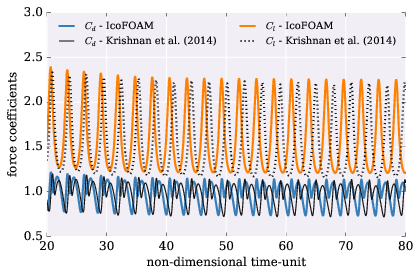

In [5]:
path = os.path.join(os.getcwd(), 
                    'openfoam', 
                    'openfoam_forceCoefficientsRe2000AoA30.pdf')
display(WImage(filename=path))

#### Figure

Instantaneous force coefficients of the snake with angle-of-attack 35 degrees and at Reynolds number 2000.
We compare the signals from IcoFOAM with those reported in Krishnan et al. (2014).
Beside the phase difference, the instantaneous force coefficients are in good agreement with Krishnan et al. (2014).
Averaging the values between 32 and 64 time-units, we get: cd=0.9810 (+1.4% relatively compared to Krishnan et al., 2014) and cl=1.5753 (+2.8%).
The average Strouhal number within the same time-interval is St=0.3445 (+2.0%).

Note to ourselves:
* The mesh used for this simulation is the one described in the previous caption (SnappyHexMesh, 3.4M cells).

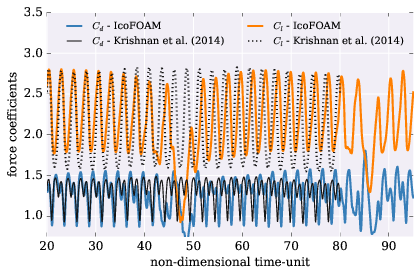

In [6]:
path = os.path.join(os.getcwd(), 
                    'openfoam', 
                    'openfoam_forceCoefficientsRe2000AoA35.pdf')
display(WImage(filename=path))

#### Figure

Instantaneous force coefficients of the snake with angle-of-attack 35 degrees and Reynolds number 2000.
We compared the signals obtained with IcoFOAM with those from Krishnan et al. (2014).
When averaging the coefficients between 32 and 64 time-units, we get:
 cd=1.2306 (-6.5% relatively compared to Krishnan et al., 2014) and cl=2.0803 (-3.1%).
Although, we observe a lift enhancement, on average, at angle 35 degrees and Reynolds number 2000, we have to report discrepancies in the force signals compared to previously published results.
Krishnan et al. (2014) noted that forces on the bluff-body reach a periodic regime after 30 time-units of flow simulation.
Up to 35 time-units, IcoFOAM results are in good agreement, except we obtained higher minima.
Between 40 and 50 time-units, we observe a brutal drop in the lift coefficient (not present in the previous publication).
Between 50 and 80 time-units, the force coefficients seem to reach again the periodic regime.
Finally between 80 and 90 time-units, we observe a second drop the mean lift coefficient.

Note to ourselves:
* The mesh used for this simulation is the one described two captions before (SnappyHexMesh, 3.4M cells).
* This simulation was run for 95 time-units, while Krishnan et al. (2014) only ran theirs up to 80 time-units. We wanted to know is the vortex merging phenomenon was singular in time.

## IBAMR

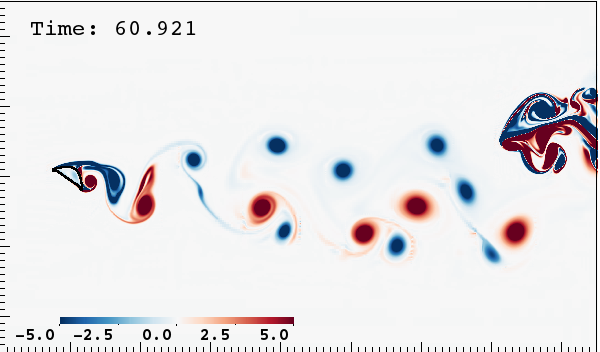

In [7]:
path = os.path.join(os.getcwd(), 
                    'ibamr', 
                    'ibamr_vorticity56Re2000AoA35_zeroGradientOutlet.pdf')
display(WImage(filename=path))

#### Figure

Filled contours of the vorticity field after approximately 61 time-units of flow simulation for snake with angle-of-attack 35 degrees and  Reynolds number 2000.
We used a zero-gradient condition at the outlet boundary for the velocity variable.
We observe some blockage effect at the outlet: the vortices are not properly convected outside the computational domain and propagate back into it.
As a workaround, and since no advective boundary condition is available in the IBAMR library, we used a "stabilized outlet" boundary condition that basically acts as a force pushing the flow outside the domain.

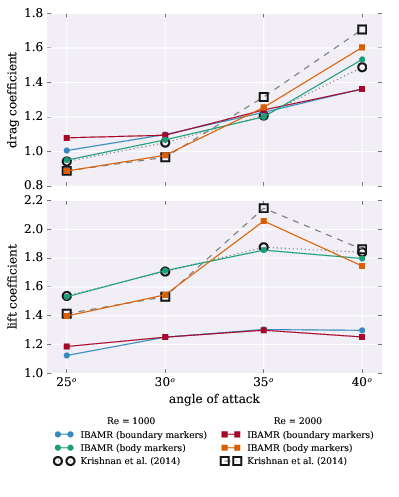

In [8]:
path = os.path.join(os.getcwd(), 
                    'ibamr', 
                    'ibamr_forceCoefficientsVsAoA.pdf')
display(WImage(filename=path))

#### Figure

Time-averaged drag coefficient (top) and lift coefficient (bottom) as a function of the angle-of-attack of the snake cross-section for Reynolds numbers 1000 (circles) and 2000 (squares).
Non-filled symbols correspond to averages reported in Krishnan et al. (2014).
We averaged the force coefficients between 32 and 64 time-units.
We report the values obtained with IBAMR for two types of body discretization: (1) case where the Lagrangian markers are evenly placed on the surface of the bluff-body (red and blue symbols) and (2) case where the Lagrangian markers cover the entire cross-section (green and orange symbols).
We note significant differences with Krishnan et al. (2014) when boundary markers are used.
We were able to replicate the lift enhancement mechanism of the snake at angle-of-attack 35 degrees and Reynolds number 2000 when enforcing the non-slip condition on the entire body.

Note to ourselves:
* All the averages where obtained with simulations where we used a "stabilized outlet" condition for the velocity field at the outlet boundary.

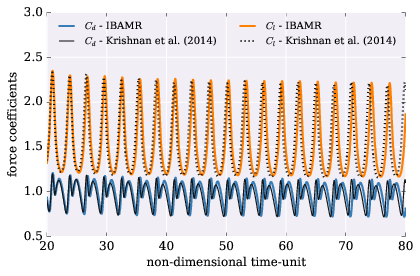

In [9]:
path = os.path.join(os.getcwd(), 
                    'ibamr', 
                    'ibamr_forceCoefficientsRe2000AoA30.pdf')
display(WImage(filename=path))

#### Figure

Instantaneous force coefficients of the snake with angle-of-attack 30 degrees and for Reynolds number 2000.
For this simulation, the Lagrangian markers where evenly spaced over the entire cross-section of the snake.
The signals are in very good agreement with Krishnan et al. (2014) -- we observe a negligible increasing phase difference of the course of the simulation.
When averaging the force coefficients between 32 and 64 time-units of flow simulation, we get: cd=0.9789 (+1.2%, relatively compared to Krishnan et al., 2014) and cl=1.5456 (+0.9%).
We obtain an average Strouhal number of 0.3367 (-0.3%) within the same time-interval.

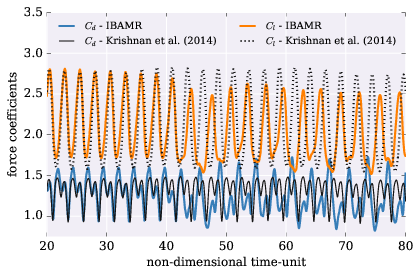

In [10]:
path = os.path.join(os.getcwd(), 
                    'ibamr', 
                    'ibamr_forceCoefficientsRe2000AoA35.pdf')
display(WImage(filename=path))

#### Figure

Instantaneous force coefficients of a snake cross-section with angle-of-attack 35 degrees and for Reynolds number 2000.
The Lagrangian markers cover the entire body.
When averaging the signals between 32 and 64 time-units of flow simulation, we obtain a mean drag coefficient of 1.2558 (-4.6%, relatively compared to Krishnan et al., 2014) and a mean lift coefficient of 2.0580 (-4.1%).
Therefore, on average, we note a lift-enhancement at angle-of-attack 35 degrees and Reynolds number 2000, but observe some significant differences in the instantaneous forces.
Up to 35 time-units, the signals are in good agreement with Krishnan et al. (2014), even if we got higher minima for the lift and higher maxima for the drag.
From 35 time-units until the end of the simulation, we observe a drop in the mean lift coefficient and the signal is not periodic anymore.

## PetIBM

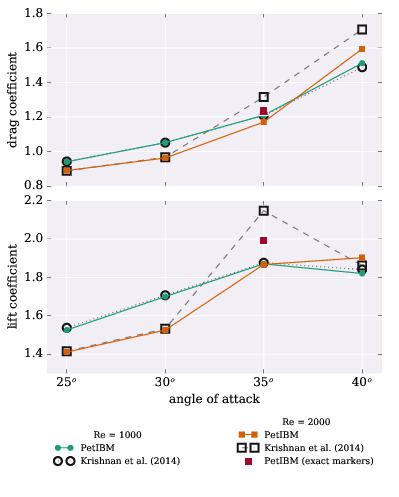

In [11]:
path = os.path.join(os.getcwd(), 
                    'petibm', 
                    'petibm-0.1.1_forceCoefficientsVsAoA.pdf')
display(WImage(filename=path))

#### Figure

Time-averaged drag coefficient (top) and lift coefficient (bottom) as a function of the angle-of-attack of the snake cross-section and for Reynolds numbers 1000 (circles) and 2000 (squares).
Empty symbols represent the mean values from Krishnan et al. (2014).
The single red square shows the averaged value obtained for the case where the snake boundary is slightly displaced in the domain.
We averaged the instantaneous force coefficients between 32 and 64 time-units.
Although PetIBM implements the same mathematical formulation of the immersed-boundary method than cuIBM (used by Krishnan et al., 2014), we were first unable to capture the lift-enhancement mechanism at angle-of-attack 35 degrees and Reynolds number 2000.
We obtain a mean lift coefficient of 1.8671 (-13.0% relatively compared to Krishnan et al., 2014).
However, in the situation where we displaced all Lagrangian markers by a small amount, the mean lift coefficient now reaches 1.9936 (-7.1% relatively compared to Krishnan et al., 2014) and the peak in the lift curve becomes more pronounced.
Those results show that the method and the mesh used to compute the highly unsteady flow around a bluff-body are very sensitive to the location of the immersed-boundary within the domain.

Note to ourselves:
* PetIBM implements the immersed-boundary projection method from Taira and Colonius (2007).
* We use the open-source PETSc library to compute the solution on distributed-memory architectures.
* The linear algebra library is provided by PETSc.
* We use the same input parameters than Krishnan et al. (2014).
* The only difference is that in the first batch of simulations, the snake geometry was rotated (with angle 35 degrees) around the center of mass, while Krishnan et al. (2014) chose (0, 0) as center of rotation.
* The single red square symbol corrects this difference and the exact same set of Lagrangian markers is used.

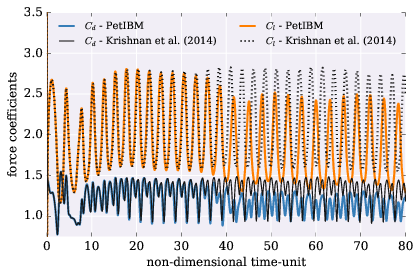

In [12]:
path = os.path.join(os.getcwd(), 
                    'petibm', 
                    'petibm-0.1.1_forceCoefficientsRe2000AoA35.pdf')
display(WImage(filename=path))

#### Figure

Instantaneous force coefficients of the snake with angle-of-attack 35 degrees and for Reynolds number 2000. 
We compare our results with Krishnan et al. (2014).
While the force coefficients are in very good agreement up to 35 time-units of flow simulation, we notice an irrevocable drop in the mean force coefficients.
If we had chosen a different time-interval (e.g. 15 to 35 time-units) to compute the mean values, we would have reported a peak in the lift curve replicating the finding from Krishnan et al. (2014).
We could have decided to stop the simulation after 35 time-units arguing that the flow reached a periodic regime.
By running the simulation over a bigger time-integration period, we have been able to notice divergences in the results while employing the same mathematical formulation.

Note to ourselves:
* The input parameters are the same than Krishnan et al. (2014), except the fact that Lagrangian markers are slightly displaced (all with the same displacement) compared to Krishnan et al. (2014). This displacement is due to the fact that we did not rotate the cross-section around the same point.

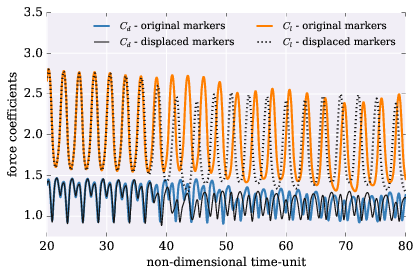

In [13]:
path = os.path.join(os.getcwd(), 
                    'petibm', 
                    'petibm-0.1.1_forceCoefficientsRe2000AoA35CompareMarkers.pdf')
display(WImage(filename=path))

#### Figure

Instantaneous force coefficients of the snake with angle-of-attack 35 degrees and for Reynolds number 2000.
We compare two PetIBM simulations (using the same version of the code) that have the same input parameters, except that one of them (noted "displaced markers") uses a snake geometry rotated around its center of mass while the second one ("original markers") uses the exact same Lagrangian markers than Krishnan et al. (2014).
Differences in the force coefficients appear after about 35 time-units.
Although both lift coefficients experience a drop in the mean value, it does not occur at the same moment.
This comparison shows that unsteady forces on the bluff-body greatly depends on the location of the Lagrangian markers within the computational domain.
When averaging the lift coefficient between 32 and 64 time-units, we do observe a slight lift-enhancement at 35 degrees and for Reynolds number 2000 when the body is in its original location (same markers than Krishnan et al., 2014).

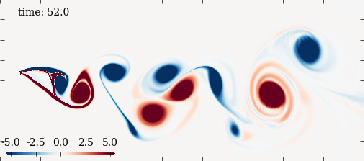

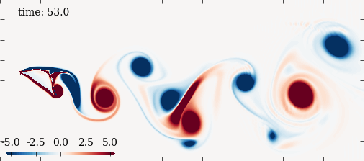

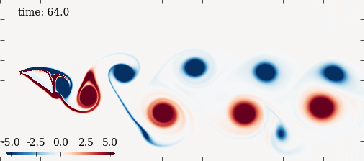

In [14]:
path = os.path.join(os.getcwd(), 
                    'petibm', 
                    'petibm-0.1.1_vorticity0130000Re2000AoA35.pdf')
display(WImage(filename=path))
path = os.path.join(os.getcwd(), 
                    'petibm', 
                    'petibm-0.1.1_vorticity0132500Re2000AoA35.pdf')
display(WImage(filename=path))
path = os.path.join(os.getcwd(), 
                    'petibm', 
                    'petibm-0.1.1_vorticity0160000Re2000AoA35.pdf')
display(WImage(filename=path))

#### Figure

Filled contours of vorticity field after 52 (top), 53 (middle), and 64 (bottom) time-units of flow simulation for a snake with angle-of-attack 35 degrees and a Reynolds number of 2000.
After 53 time-units of flow simulation, we note two counter-clockwise vortices (in red) merging together, destroying the previously aligned near wake vortices.
This vortex merging phenomenon alter permanently the wake signature afterwards: the vortices are not aligned anymore, the width of the wake becomes larger, and we observe a 1S+1P pattern (a single clockwise rotating vortex on the upper side of the wake and an unbalanced vortex dipole on the bottom side).

## cuIBM

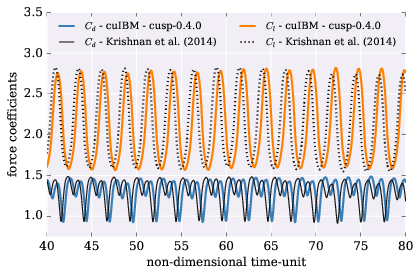

In [15]:
path = os.path.join(os.getcwd(), 
                    'cuibm', 
                    'cuibm-revision77-cusp-0.4.0_forceCoefficientsRe2000AoA35.pdf')
display(WImage(filename=path))

#### Figure

Instantaneous force coefficients of a snake cross-section at angle-of-attack 35 degrees and Reynolds number 2000.
We used the same version of cuIBM than Krishnan et al. (2014) while using another version of the cusp library (0.4.0) to iteratively solve the linear systems on a single GPU (K40).
We also used the same input parameters than Krishnan et al. (2014) attempting to reproduce their results.
Except for the phase difference, we obtain good agreement between our results and the previous published ones.
Averaging the force coefficients between 32 and 64 time-units of flow simulation, we obtain a mean drag coefficient of 1.2979 (-1.39% relatively compared to Krishnan et al., 2014) and a mean drag coefficient of 2.1049 (-2.0%).

Note to ourselves:
* Anush mentioned on the figShare repository that he used the "revision 558" of the cusp library to run the snake simulations. So, I looked the status of the GitHub repository after 558 commits and saw that it was in its 0.3.1 version. At that time on Phantom, I was using cuda-5.5 and cusp-0.3.1 was too old to support this cuda version. This is why I used cusp-0.4.0.

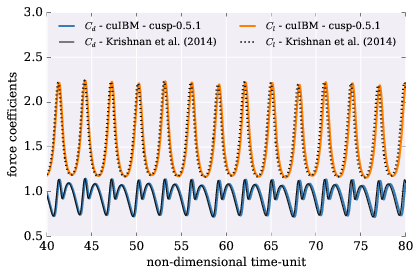

In [16]:
path = os.path.join(os.getcwd(), 
                    'cuibm', 
                    'cuibm-cusp-0.5.1_forceCoefficientsRe2000AoA30.pdf')
display(WImage(filename=path))

#### Figure

Instantaneous force coefficients of the bluff-body with angle-of-attack 30 degrees and Reynolds number 2000.
We used a newer version of cuIBM and a more recent version of the library cusp (0.5.1).
The force coefficient signals closely match previously published results (Krishnan et al., 2014).
Between 32 and 64 time-units of flow simulation, the mean force coefficients and the Strouhal number are identical (up to 3 digits) to those published in Krishnan et al. (2014).

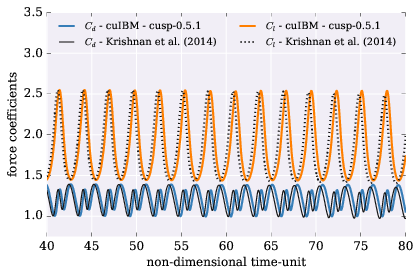

In [17]:
path = os.path.join(os.getcwd(), 
                    'cuibm', 
                    'cuibm-cusp-0.5.1_forceCoefficientsRe1000AoA35.pdf')
display(WImage(filename=path))

#### Figure

Instantaneous force coefficients at angle 35 degrees and Reynolds number 1000 using a newer version of cuIBM and cusp-0.5.1.
Beside from a phase difference between the instantaneous force coefficients, we obtain good agreement in the time-averaged force coefficients with those from Krishnan et al. (2014).
Averaging between 32 and 64 time-units of flow simulation, we obtain a mean lift coefficient of 1.8738 (-0.1% relatively compared to Krishnan et al., 2014), a mean drag coefficient of 1.2101 (+0.1%), and a mean Strouhal number of 0.3568 (-0.6%).

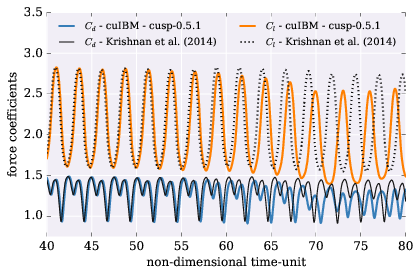

In [18]:
path = os.path.join(os.getcwd(), 
                    'cuibm', 
                    'cuibm-cusp-0.5.1_forceCoefficientsRe2000AoA35.pdf')
display(WImage(filename=path))

#### Figure

Instantaneous force coefficients of the snake with angle-of-attack 35 degrees and for Reynolds number 2000 using a newer version of cuIBM and cusp-0.5.1.
Up to 55 time-units of flow simulation, differences with the force coefficients published in Krishnan et al. (2014) are negligible.
We note a drop in the mean coefficients over the end of the simulation.
Krishnan et al. (2014) reported mean force coefficients between 32 and 64 time-units of flow simulation.
Repeating this post-processing step, we are able to capture the lift-enhancement mechanism.
However, the present signals clearly show that the unsteady periodic regime is deteriorated over the end of the simulation.

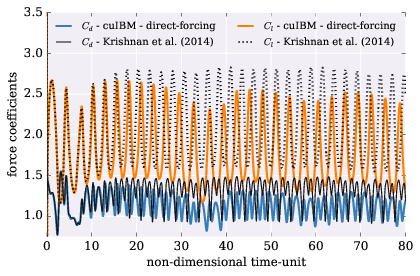

In [19]:
path = os.path.join(os.getcwd(), 
                    'cuibm', 
                    'cuibm-cusp-0.5.1_forceCoefficientsRe2000AoA35DirectForcing.pdf')
display(WImage(filename=path))

#### Figure

Instantaneous force coefficients of the snake with angle-of-attack 35 degrees and for Reynolds number 2000 using a version of direct-forcing method (Fadlun et al., 2001) implemented in cuIBM.
We compare our results with Krishnan et al. (2014) who employed the immersed-boundary projection method from Taira and Colonius (2007).
For the first 15 time-units, the instantaneous force coefficients from the two methods are in very good agreement.
Afterwards, the mean lift and drag coefficients never reach the high values reported in Krishnan et al. (2014).
Averaging the signals between 32 and 64 time-units of flow simulation, we get a mean lift coefficient of 1.7793 (-17.1% relatively compared to Krishnan et al., 2014).
Interestingly, using the same software but a different mathematical formulation of the immersed-boundary method leads to different conclusions.
With the same method, we have been able to reproduce the lift enhancement mechanism observed in Krishnan et al. (2014).
However, with a different method, we have not been able to replicate this finding.